In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

### Q10: What are the average sales of products sales per store monthly?



In [5]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key,tim.month,AVG(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key" \
              " GROUP BY (s.store_key,tim.month) "\
              "ORDER BY tim.month"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0003', 1, Decimal('105.2028985507246377')),
 ('S0004', 1, Decimal('111.2584745762711864')),
 ('S0005', 1, Decimal('100.6913265306122449')),
 ('S0006', 1, Decimal('113.9224137931034483')),
 ('S0007', 1, Decimal('109.8085937500000000')),
 ('S0008', 1, Decimal('103.8023809523809524')),
 ('S0009', 1, Decimal('102.7041984732824427')),
 ('S0010', 1, Decimal('106.9003623188405797')),
 ('S00100', 1, Decimal('110.9053398058252427')),
 ('S00101', 1, Decimal('100.5538793103448276')),
 ('S00102', 1, Decimal('102.6153846153846154')),
 ('S00103', 1, Decimal('109.1917293233082707')),
 ('S00104', 1, Decimal('109.5137614678899083')),
 ('S00105', 1, Decimal('93.6500000000000000')),
 ('S00106', 1, Decimal('114.9629629629629630')),
 ('S00107', 1, Decimal('110.6666666666666667')),
 ('S00108', 1, Decimal('107.5055555555555556')),
 ('S00109', 1, Decimal('112.0629629629629630')),
 ('S0011', 1, Decimal('101.750000

In [6]:
df = pd.DataFrame(list(records), columns=['Store_key', 'Month', 'Average_Sales'])
df.head(10)

,Store_key,Month,Average_Sales
0,S0001,1,97.7543103448275862
1,S0002,1,98.2902684563758389
2,S0003,1,105.2028985507246377
3,S0004,1,111.2584745762711864
4,S0005,1,100.6913265306122449
5,S0006,1,113.9224137931034483
6,S0007,1,109.8085937500000000
7,S0008,1,103.8023809523809524
8,S0009,1,102.7041984732824427
9,S0010,1,106.9003623188405797


In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = " SELECT s.store_key ,tim.month,AVG(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key " \
              "Where s.store_key = 'S0001' " \
              " GROUP BY (s.store_key,tim.month) "\
              "ORDER BY tim.month"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639'))]

In [12]:
df1 = pd.DataFrame(list(records), columns=['Store_key', 'Month', 'Average_Sales'])
df1

,Store_key,Month,Average_Sales
0,S0001,1,97.7543103448275862
1,S0001,2,100.5776699029126214
2,S0001,3,109.4158878504672897
3,S0001,4,98.8805309734513274
4,S0001,5,99.5245535714285714
5,S0001,6,101.2459349593495935
6,S0001,7,103.9189189189189189
7,S0001,8,105.1269531250000000
8,S0001,9,96.1901041666666667
9,S0001,10,104.6166666666666667


In [13]:
df1['Average_Sales'] = pd.to_numeric(df1['Average_Sales'],errors='coerce')

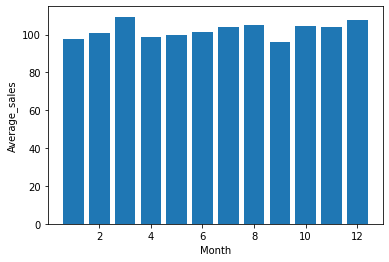

In [14]:
plt.bar(df1['Month'],df1['Average_Sales'])
plt.xlabel('Month')
plt.ylabel('Average_sales')
plt.show()

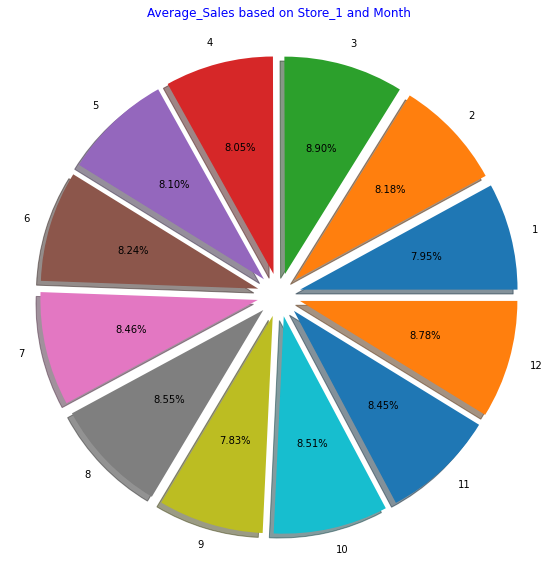

In [19]:
labels=df1['Month']
data = df1['Average_Sales']
textprops = {"fontsize":10}
plt.title('Average_Sales based on Store_1 and Month',loc='center',color='b')
plt.pie(data, labels=labels, shadow = True, textprops = textprops , autopct='%.2f%%',explode=(0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()